Integrantes: 

*   Yully Cadena 
*   Diana Peña





##Universidad Externado
**Detección de fallos operativos de la empresa:**

Nos han hecho entrega de una base de datos de una empresa, para lograr realizar 
la regresión logística hallando la probabilidad de incumplimiento, la perdida total esperada y realizar la simulación de Montecarlo. Primeramente, debemos tener una columna default que tenga valores binarios (0,1), para ello vamos a utilizar la columna events, que la transformaremos en una columna con valores binarios teniendo en cuanta que los valores que sean mayores o iguales a 5 pasarán a ser 0 y los que sean menores a 5 pasarán a ser 1. Una vez que hallamos realizado esto, se hacen unas gráficas de violín, exactamente 2, una gráfica de violín de  Months vs  Events y una gráfica de violín de Loss vs Events; esto con el fin de saber cuál es la más óptima para realizar nuestra regresion logística.

De igual manera, una vez hecho esto procedemos a realizar nuestra regresion logística; primero, realizamos 3 regresiones logísticas, una de Months vs Events, una de Loss vs Events y otra de Months,Loss vs Events y realizamos sus respectivas graficas para tener un mejor análisis de estas. Luego hallamos nuestra probabilidad de incumplimiento, para está realizamos una regresión logística y encontramos su interceptó; asi mismo, realizamos la codificación dummie, una predicción de probabilidad de incumplimiento y hacemos un informe de este que nos da la probabilidad de incumplimiento total. 

Finalizando, se halla la perdida total esperada en base a los datos que hemos obtenido, también realizamos la simulación de monte-carlo, esta se hace con parámetros de 3 días que se tomara como 3000 veces; por último,  luego creamos nuestras gráficas para analizar mejor la simulación. Todo esto se realizó con el objetivo de encontrar la probabilidad de incumplimiento en una empresa, para poder calcular la perdida total esperada, y con base a estos datos que la empresa pueda tomar acciones desde su parte de gestión de riesgos.

#Importamos las librerias necesarias

In [ ]:
# Tratamiento de datos 
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

Una vez que hemos importado nuestras librerías, procedemos a leer nuestro archivo xlsx y convertirlo en un data frame, haciendo uso de pandas con el comando, pandas.read_excel()

Luego, limpiamos nuestro dataframe para eliminar los valores vacíos y volver la columna Events en una columna binaria

In [ ]:
# le decimos al programa cuál es el archivo
path = '/content/OpLoss (2).xlsx'
# leemos nuestro archivo
Hoja = pd.read_excel(path)
# verificamos en forma de false y true
# dónde los datos que salgan como true 
# van a ser aquellos que están vacios
Hoja_veri = pd.isnull(Hoja)
Hoja_limpia = Hoja
# realizamos un for para recorrer
# nuestro dataframe
for i in range(len(Hoja)):
  for j in range(3):
    # si en la fila y en la columna
    # en la que estamos, el valor es true
    # le damos a esa celda vacía un valor de 0
    if Hoja_veri.iloc[i,j] == True:
      Hoja_limpia.at[i,'default'] = 0
    else:
      pass

#Volvemos la columna Events en balores binarios si son menores a 5 y diferente a 0 van a ser 1
for i in range(len(Hoja)):
  #Realizamos un for para recorrer las columnas
  for j in range(3):
    #Verificamos si los valores en la columna events son mayores a 5 y le damos un valor de 0
    if Hoja.iloc[i,-1] >= 5:
      Hoja_limpia.at[i,'Events'] = 0
    #Verificamos si los valores en la columna Events son menores a 5 y diferente a 0 van a ser 1
    elif Hoja.iloc[i,-1] < 5 and Hoja.iloc[i,-1] != 0:
      Hoja_limpia.at[i,'Events'] = 1

El primer paso antes de generar un modelo de regresión logística simple es representar los datos para poder intuir si existe una relación entre la variable independiente y la variable respuesta.



*   Variable Dependiente: Event (Se convierte a binaria) 
*   Variables independientes: Months y loss



In [ ]:
# realizamos una lista con los nombres de las columnas
Columns_name = Hoja_limpia.columns.values
# realizamos un for para realizar un gráfico de todas las columnas vs default
for i in range(2):
  # le damos un tamaño al axis 
  fig, ax = plt.subplots(figsize=(6,3.84))
  # realizamos una gráfica de violin
  sns.violinplot(x="Events",y=Columns_name[i],data = Hoja_limpia,ax = ax)
  # le damos un título a la figura
  ax.set_title(f"gráfica de violin con respecto a {Columns_name[i]}")

Se mira cual de las dos tiene mayor densidad, si es asi, quiere decir que son optimas para el analisis en la regresión logistica 


Una vez hecho esto, procedemos a hacer la regresion logística, de todas las columnas vs Events, y de todas conjuntas vs Events.

Como en todo estudio predictivo, no solo es importante ajustar el modelo, sino también cuantificar su capacidad para predecir nuevas observaciones. Para poder hacer esta evaluación, se dividen los datos en dos grupos, uno de entrenamiento y otro de test

In [ ]:
# regresion logistica de todas las columnas contra default
# se definen los ejes

X = Hoja_limpia.drop("Events",axis=1)
Y = Hoja_limpia["Events"]
# definimos los train y los test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state = 1)
# realizamos la regresion logistica
log = LogisticRegression()
forest = RandomForestClassifier()
knn = KNeighborsClassifier()
svm = SVC()
log_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('log', log)
])
print(f"\n\nRegresion logistica para todas las Columnas: \n\n")
for model, model_name in zip([log_pipe,forest,knn,svm],['Logistic Regression','Random Forest Classifier','KNN Classifier','SV Classifier']):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print(model_name+":\n")
    print("Accuracy Score:", accuracy_score(Y_test, Y_pred))
    print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
    print("Clasisfication Report:\n", classification_report(Y_test, Y_pred))

print(f"\n\n Regresion logistica para todas las columnas una por una")
for i in range(2):
  Y = Hoja_limpia["Events"]
  X = Hoja_limpia[[Columns_name[i]]]
 # definimos los train y los test
  X_train, X_test, Y_train, Y_test = train_test_split(X.values.reshape(-1,1), Y.values.reshape(-1,1),train_size = 0.8, random_state = 1234, shuffle = True)
  X_train = sm.add_constant(X_train, prepend=True)
  modelo = sm.Logit(endog=Y_train, exog=X_train,)
  modelo = modelo.fit()
  print(f"\n\nRegresión logística de {Columns_name[i]}\n")
  print(f"{modelo.summary()}\n\n")



Regresion logistica para todas las Columnas: 


Logistic Regression:

Accuracy Score: 0.7
Confusion Matrix:
 [[ 0  6]
 [ 0 14]]
Clasisfication Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.70      1.00      0.82        14

    accuracy                           0.70        20
   macro avg       0.35      0.50      0.41        20
weighted avg       0.49      0.70      0.58        20

Random Forest Classifier:

Accuracy Score: 0.95
Confusion Matrix:
 [[ 5  1]
 [ 0 14]]
Clasisfication Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.93      1.00      0.97        14

    accuracy                           0.95        20
   macro avg       0.97      0.92      0.94        20
weighted avg       0.95      0.95      0.95        20

KNN Classifier:

Accuracy Score: 0.95
Confusion Matrix:
 [[ 5  1]
 [ 0 14]]
Clasis

Como no tenemos datos completos para hacer la regresión logistica es por esto que se hace para hacer la predicción de datos. 

Realizamos las gráficas de la regresion logistica

Optimization terminated successfully.
         Current function value: 0.603787
         Iterations 5
    Months   Loss  Events
0        1    204       1
1        2  14604       1
2        3    337       1
3        4  10923       1
4        5   7557       0
..     ...    ...     ...
91      92   9451       0
92      93   6357       0
93      94   2877       1
94      95  10633       1
95      96   5451       0

[96 rows x 3 columns]
Optimization terminated successfully.
         Current function value: 0.610976
         Iterations 5


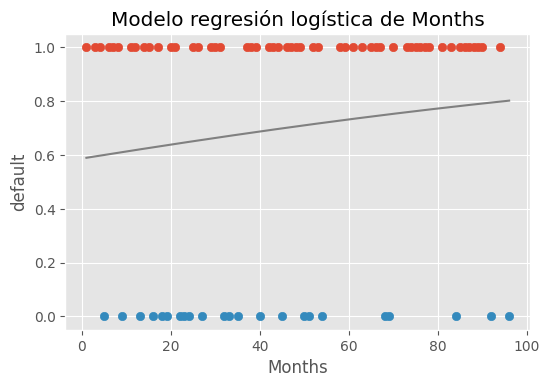

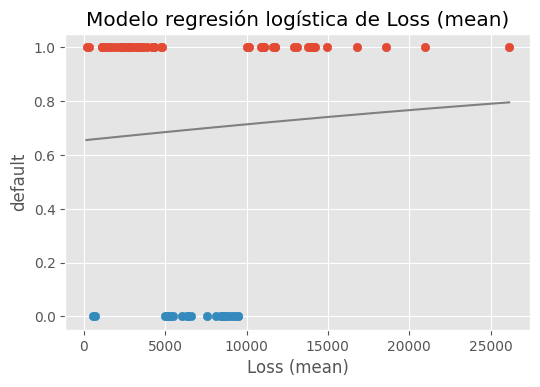

In [ ]:
Y = Hoja_limpia["Events"]
X = Hoja_limpia[["Months"]]
# definimos los train y los test
X_train, X_test, Y_train, Y_test = train_test_split(X.values.reshape(-1,1), Y.values.reshape(-1,1),train_size = 0.8, random_state = 1234, shuffle = True)
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=Y_train, exog=X_train,)
modelo = modelo.fit()
# Predicción de probabilidades
# ==============================================================================
predicciones = modelo.predict(exog = X_train)

# Predicciones en todo el rango de X
# ==============================================================================
# Se crea un vector con nuevos valores interpolados en el rango de observaciones.
grid_X = np.linspace(start = min(Hoja_limpia.Months),stop  = max(Hoja_limpia.Months),num   = 200).reshape(-1,1)
grid_X = sm.add_constant(grid_X, prepend=True)
predicciones = modelo.predict(exog = grid_X)
# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(
    X_train[(Y_train == 1).flatten(), 1],
    Y_train[(Y_train == 1).flatten()].flatten()
)
ax.scatter(
    X_train[(Y_train == 0).flatten(), 1],
    Y_train[(Y_train == 0).flatten()].flatten()
)
ax.plot(grid_X[:, 1], predicciones, color = "gray")
ax.set_title("Modelo regresión logística de Months")
ax.set_ylabel("default")
ax.set_xlabel("Months");

print(Hoja_limpia)
#regresion logistica de ed
Y = Hoja_limpia["Events"]
X = Hoja_limpia[["Loss"]]
# definimos los train y los test
X_train, X_test, Y_train, Y_test = train_test_split(X.values.reshape(-1,1), Y.values.reshape(-1,1),train_size = 0.8, random_state = 1234, shuffle = True)
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=Y_train, exog=X_train,)
modelo = modelo.fit()
# Predicción de probabilidades
# ==============================================================================
predicciones = modelo.predict(exog = X_train)
# Predicciones en todo el rango de X
# ==============================================================================
# Se crea un vector con nuevos valores interpolados en el rango de observaciones.
grid_X = np.linspace(start = min(Hoja_limpia.Loss),stop  = max(Hoja_limpia.Loss),num   = 200).reshape(-1,1)
grid_X = sm.add_constant(grid_X, prepend=True)
predicciones = modelo.predict(exog = grid_X)
# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(
    X_train[(Y_train == 1).flatten(), 1],
    Y_train[(Y_train == 1).flatten()].flatten()
)
ax.scatter(
    X_train[(Y_train == 0).flatten(), 1],
    Y_train[(Y_train == 0).flatten()].flatten()
)
ax.plot(grid_X[:, 1], predicciones, color = "gray")
ax.set_title("Modelo regresión logística de Loss (mean)")
ax.set_ylabel("default")
ax.set_xlabel("Loss (mean)");

Default: 0 : que se cumple  y 1: que se incumple

Entre mas se acerque a 1 hay mayor probabilidad de perdida y hacia abajo menor propabilidad de perdida

##PD (Modelo de Probabilidad de Incumplimiento)
Con PD nos estamos refiriendo al modelo de probabilidad de incumplimiento

Realizamos la regresion logística

In [ ]:
# Variables independientes
X_multi = Hoja_limpia.drop("Events", axis = 1)

# Estatus del préstamo como variable a predecir
y = Hoja_limpia[['Events']]

# Modelo de regresión logística multivariada
clf_logistic_multi = LogisticRegression(solver='lbfgs').fit(X_multi, np.ravel(y))

# Print the intercept of the model
print(clf_logistic_multi.intercept_)

[8.19374581e-05]


Vemos como el modelo tiene un interceptó más cercano a cero, Esto significa que las probabilidades logarítmicas de un no incumplimiento se acerca a cero, quiere decir que hay mas probabilidad de perdida 

Luego se ajusta el modelo de regresión para predecir la probabilidad de que ocurra un evento (representado por la variable dependiente binaria) en función de las variables independientes. Y luego, se hallan los coeficientes 

In [ ]:
from sklearn.model_selection import train_test_split

# Variables independientes y dependiente
# X = Hoja_limpia[['loan_int_rate','person_emp_length','person_income']]
X = Hoja_limpia.drop('Events', axis=1)
y = Hoja_limpia[['Events']]

# Conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Ajuste del modelo de regresión logística
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Coeficientes del modelo
print(clf_logistic.coef_)

[[2.08090943e-03 7.84324165e-05]]


Los coeficientes indican la importancia de cada columna o característica para la predicción. Cuanto más positivo es el valor, más predice los incumplimientos.

##Ahora realizamos la codificación dummie

Esto se realiza para convertir variables categóricas en variables numéricas

In [ ]:
# Conjutos de datos numéricos y no numéricos
cred_num = Hoja_limpia.select_dtypes(exclude=['object'])
cred_str = Hoja_limpia.select_dtypes(include=['object'])


# Unión de las variables numéricas con las codificadas
Hoja_limpia_prep = pd.concat([cred_num], axis=1)

# Lista de columnas del nuevo cnjunto de datos
print(Hoja_limpia_prep.columns)

Index(['Months', 'Loss', 'Events'], dtype='object')


##Ahora realizamos la predicción de probabilidad de incumplimiento

In [ ]:
# Variables independientes y dependiente
X = Hoja_limpia_prep.drop('Events',axis=1)
y = Hoja_limpia_prep[['Events']]

# Conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Entrenamiento del modelo de regresión logística
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Predicciones de probabilidad para el estado del préstamo usando datos de prueba
preds = clf_logistic.predict_proba(X_test)

# Marcos de datos de las primeras cinco predicciones y las primeras cinco etiquetas verdaderas
preds_df = pd.DataFrame(preds[:,1][0:20], columns = ['prob_Events'])
true_df = y_test.head(20)

# Comparación de los dos marcos de datos
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))
Prob_PD = preds_df

    Events  prob_Events
0        1     0.605321
1        1     0.726894
2        0     0.671518
3        1     0.717814
4        1     0.504533
5        0     0.672484
6        0     0.630982
7        0     0.646381
8        1     0.587822
9        1     0.715334
10       1     0.635663
11       1     0.611851
12       1     0.560110
13       1     0.837910
14       1     0.870151
15       1     0.536427
16       1     0.583722
17       0     0.666852
18       1     0.776789
19       1     0.767633


ya hemos hallado nuestro pd, los datos de nuestra probabilidad de incumplimiento se encuentran en la columna prob_Events

##realizamos el informe de Events

In [ ]:
# Dataframe de las probabilidades de incumplimiento
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_Events'])

# Estado del préstamo según la probabilidad asignada
preds_df['Events'] = preds_df['prob_Events'].apply(lambda X: 1 if X > .5 else 0)

# Recuento de filas para cada estado de préstamo
print(preds_df['Events'].value_counts())
from sklearn.metrics import classification_report
print("\n")
# Reporte de clasificación
target_names = ['Non-Default', 'Events']
print(classification_report(y_test, preds_df['Events'], target_names=target_names))

1    39
Name: Events, dtype: int64


              precision    recall  f1-score   support

 Non-Default       0.00      0.00      0.00        12
      Events       0.69      1.00      0.82        27

    accuracy                           0.69        39
   macro avg       0.35      0.50      0.41        39
weighted avg       0.48      0.69      0.57        39



##Hallamos la perdida total esperada

In [ ]:
Perdida_total_esperada = preds_df['prob_Events'] *(0.2 * 11784)*Hoja_limpia_prep['Loss']
print(f"la perdida esperada es de: {Perdida_total_esperada.sum()}")

la perdida esperada es de: 464847667.25182045


##Simulacion de montecarlo

Las simulaciones de Monte Carlo son una técnica matemática que predice los posibles resultados de un evento incierto. Los programas informáticos utilizan este método para analizar datos pasados y predecir una serie de resultados futuros en función de una elección de acción.

In [ ]:
#importamos las librerías
import seaborn as sns
from scipy.stats import norm

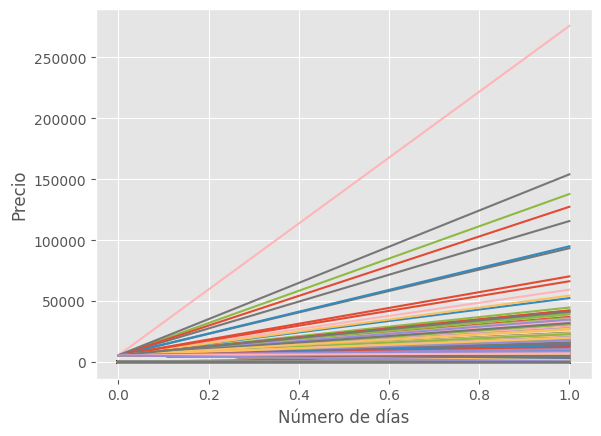

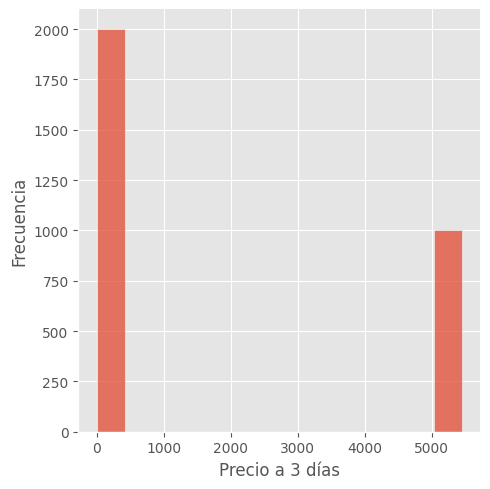

In [ ]:
#realizamos un retorno logaritmico
log_returns = np.log(1 + Hoja_limpia.pct_change())
#Calculamos la media
u = log_returns.mean()
#calculanmos la varianza
var = log_returns.var()
#definimos el factor de ajuste
drift = u - (0.5 * var)
#definimos la desviacion estandar
stdev = log_returns.std()

# los días a los cuales queremos hacer la simulación
days = 3
# el número de pruebas que realizaremos
trials = 3000
# el componente de azar que es  un array con valores al azar
z = norm.ppf(np.random.rand(days, trials))
retornos_diarios = np.exp(drift.values[:, np.newaxis] + stdev.values[:, np.newaxis] * z)
camino_de_precios = np.zeros_like(retornos_diarios)
camino_de_precios[0] = np.tile(Hoja_limpia.iloc[-1].values, trials // Hoja_limpia.shape[1])

for i in range(1, days):
    camino_de_precios[i] = camino_de_precios[i-1] * retornos_diarios[i]

plt.plot(camino_de_precios)
plt.xlabel("Número de días")
plt.ylabel("Precio")
sns.displot(pd.DataFrame(camino_de_precios).iloc[0])
plt.xlabel("Precio a " + str(days) + " días")
plt.ylabel("Frecuencia")
plt.show()

Aca se refleja la perdida en pesos con relación al núkmero de días